## Fraud Detection of credit card transactions

### Context:
It is important that credit card companies are able to recognize fraudulent credit card transactions so that customers are not charged for items that they did not purchase.

### Dataset Introduction: 

The datasets contains transactions made by credit cards in September 2013 by european cardholders.
This dataset presents transactions that occurred in two days, where we have 492 frauds out of 284,807 transactions. The dataset is highly unbalanced, the positive class (frauds) account for 0.172% of all transactions.

It contains only numerical input variables which are the result of a PCA transformation. Unfortunately, due to confidentiality issues, we cannot provide the original features and more background information about the data. Features V1, V2, … V28 are the principal components obtained with PCA, the only features which have not been transformed with PCA are 'Time' and 'Amount'. Feature 'Time' contains the seconds elapsed between each transaction and the first transaction in the dataset. The feature 'Amount' is the transaction Amount, this feature can be used for example-dependant cost-senstive learning. Feature 'Class' is the response variable and it takes value 1 in case of fraud and 0 otherwise.

The dataset can be downloaded by uncommenting the below cell and running it. Please run the cell only once to download the data. Running multiple time will create duplicate copies of the same dataset.

In [29]:
#!pip install kaggle
#!kaggle datasets download -d mlg-ulb/creditcardfraud

### Generating a model to detect fraudulent transaction

#### Importing necessary libraries for running the model

In [3]:
import numpy as np
import pandas as pd
import seaborn as sns
from sklearn.model_selection import train_test_split
from sklearn.ensemble import IsolationForest, RandomForestClassifier, GradientBoostingClassifier
import matplotlib.pyplot as plt
from sklearn.metrics import confusion_matrix, accuracy_score, f1_score, precision_score, recall_score, matthews_corrcoef
from sklearn.neural_network import MLPClassifier

#### Loading the dataset

In [4]:
df = pd.read_csv('creditcard.csv')
df.head()

,Time,V1,V2,V3,V4,V5,V6,V7,V8,V9,...,V21,V22,V23,V24,V25,V26,V27,V28,Amount,Class
0,0.0,-1.359807,-0.072781,2.536347,1.378155,-0.338321,0.462388,0.239599,0.098698,0.363787,...,-0.018307,0.277838,-0.110474,0.066928,0.128539,-0.189115,0.133558,-0.021053,149.62,0
1,0.0,1.191857,0.266151,0.166480,0.448154,0.060018,-0.082361,-0.078803,0.085102,-0.255425,...,-0.225775,-0.638672,0.101288,-0.339846,0.167170,0.125895,-0.008983,0.014724,2.69,0
2,1.0,-1.358354,-1.340163,1.773209,0.379780,-0.503198,1.800499,0.791461,0.247676,-1.514654,...,0.247998,0.771679,0.909412,-0.689281,-0.327642,-0.139097,-0.055353,-0.059752,378.66,0
3,1.0,-0.966272,-0.185226,1.792993,-0.863291,-0.010309,1.247203,0.237609,0.377436,-1.387024,...,-0.108300,0.005274,-0.190321,-1.175575,0.647376,-0.221929,0.062723,0.061458,123.50,0
4,2.0,-1.158233,0.877737,1.548718,0.403034,-0.407193,0.095921,0.592941,-0.270533,0.817739,...,-0.009431,0.798278,-0.137458,0.141267,-0.206010,0.502292,0.219422,0.215153,69.99,0


In [5]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 284807 entries, 0 to 284806
Data columns (total 31 columns):
 #   Column  Non-Null Count   Dtype  
---  ------  --------------   -----  
 0   Time    284807 non-null  float64
 1   V1      284807 non-null  float64
 2   V2      284807 non-null  float64
 3   V3      284807 non-null  float64
 4   V4      284807 non-null  float64
 5   V5      284807 non-null  float64
 6   V6      284807 non-null  float64
 7   V7      284807 non-null  float64
 8   V8      284807 non-null  float64
 9   V9      284807 non-null  float64
 10  V10     284807 non-null  float64
 11  V11     284807 non-null  float64
 12  V12     284807 non-null  float64
 13  V13     284807 non-null  float64
 14  V14     284807 non-null  float64
 15  V15     284807 non-null  float64
 16  V16     284807 non-null  float64
 17  V17     284807 non-null  float64
 18  V18     284807 non-null  float64
 19  V19     284807 non-null  float64
 20  V20     284807 non-null  float64
 21  V21     28

There are no null values. So nothing to worry about cleaning the dataset.

#### Exploratory Data Analysis:

In [6]:
print("Mean amount of transactions for fraudulent ones: ", df[df.Class == 1]['Amount'].mean())
print("Mean amount of transactions for good ones: ", df[df.Class == 0]['Amount'].mean())

Mean amount of transactions for fraudulent ones:  122.21132113821139
Mean amount of transactions for good ones:  88.29102242231328


It means that fraudulent transaction have transaction amount greater than the good ones on an average. So it is important to look at these transactions

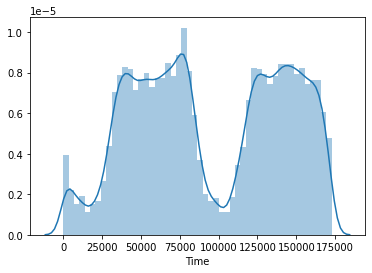

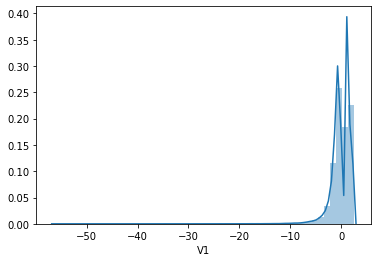

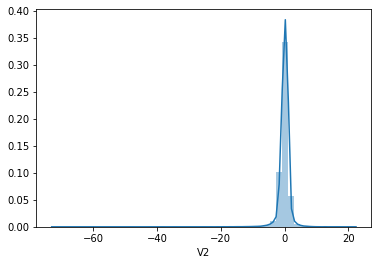

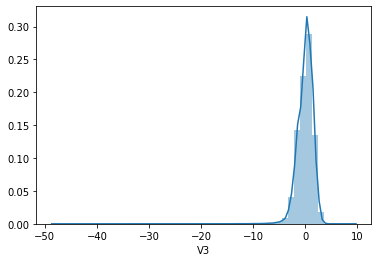

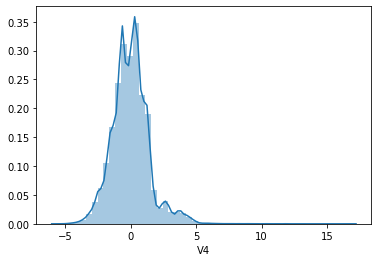

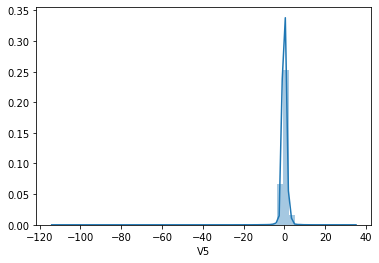

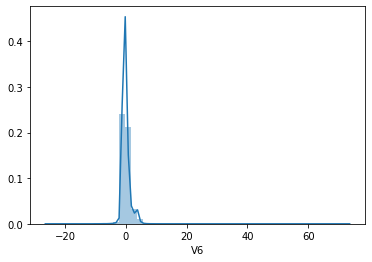

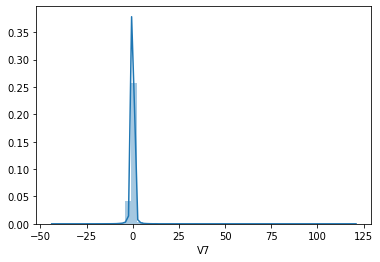

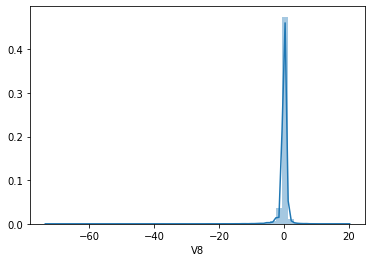

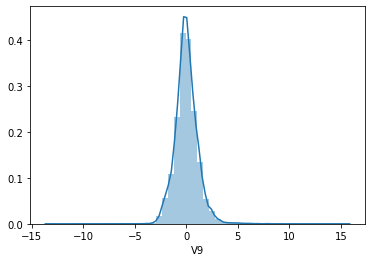

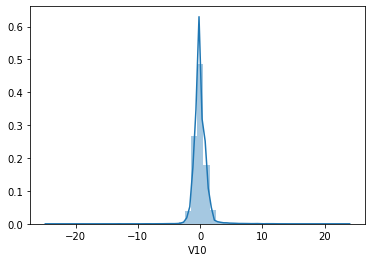

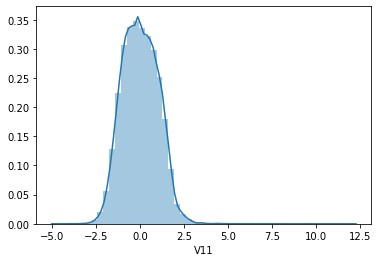

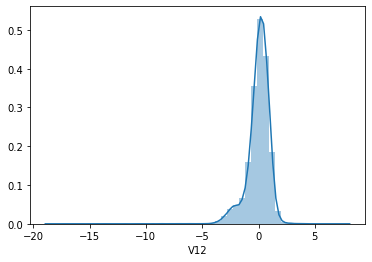

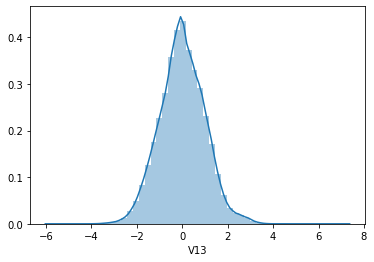

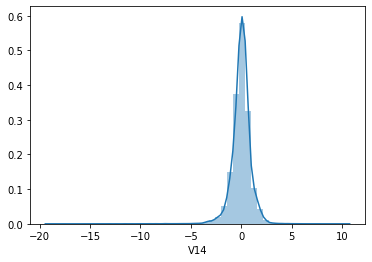

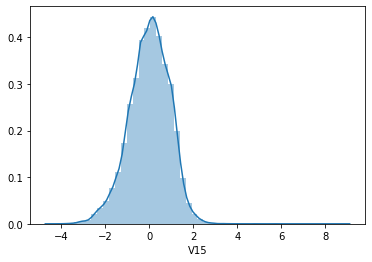

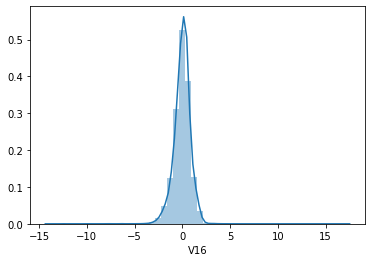

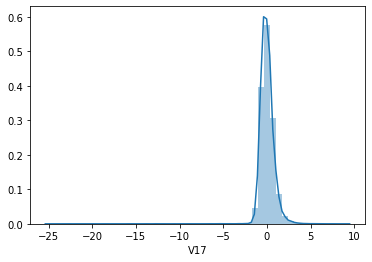

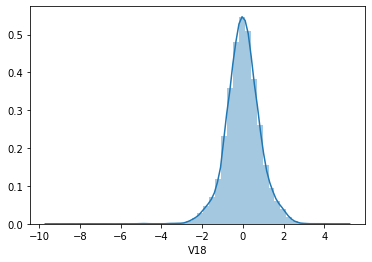

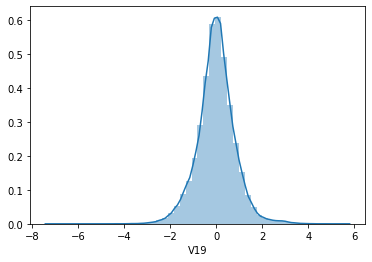

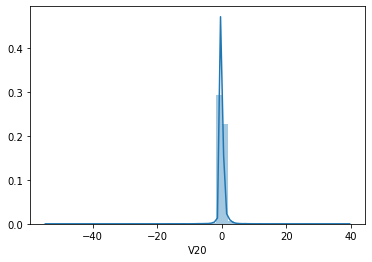

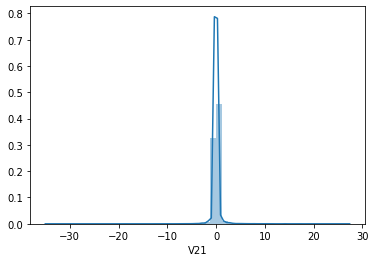

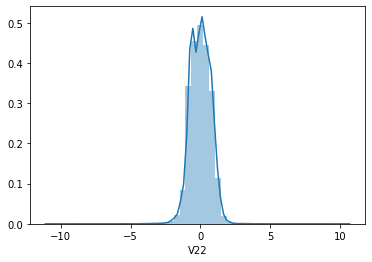

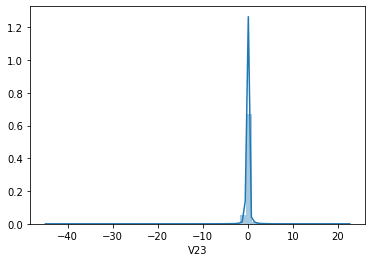

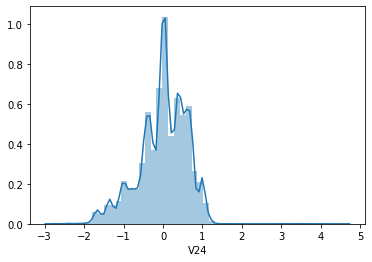

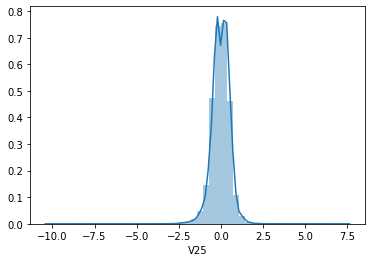

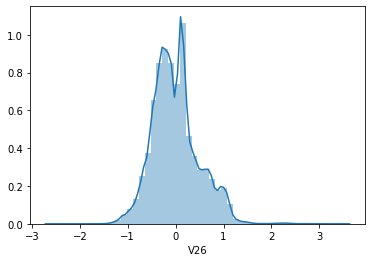

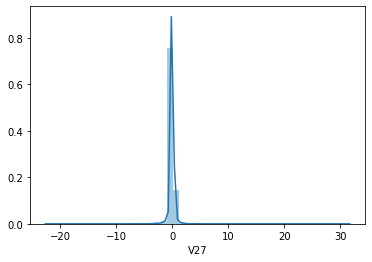

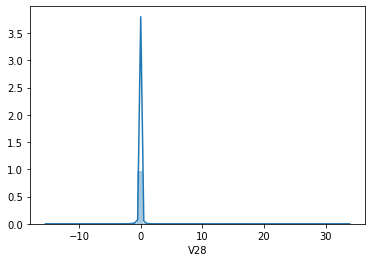

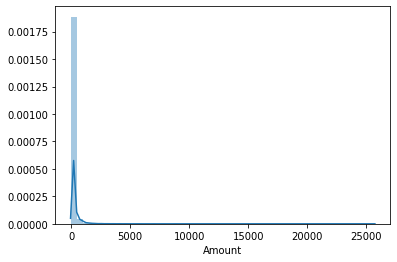

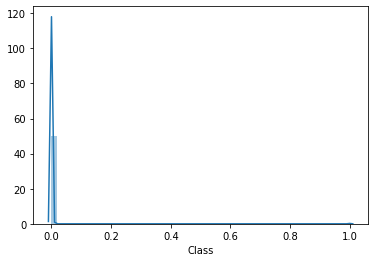

In [7]:
# Visualizing the distribution of data

for i, c in enumerate(df.columns):
    sns.distplot(df[df.columns[i]])
    plt.show()

It is understood that most the columns have values around zero and it is ok.

#### Model Building - Isolation Forest

Converting the dataset into training and testing data and see some prediction and evaluation results. The first approach to use Isolation Forest algorithm which is generally used for outlier detection. So, it will be used for setting the baseline performance of the model.

In [8]:
# Splitting the data into testing and training sets
X = df.drop('Class', axis=1)
y = df['Class']

X_data = X.values
y_data = y.values

X_train, X_test, y_train, y_test = train_test_split(X_data, y_data, random_state=2)

# Training the model
outlier_fraction = len(df[df.Class == 1])/len(df[df.Class == 0])

model_if = IsolationForest(max_samples=len(X_train), contamination=outlier_fraction, random_state=2)
model_if.fit(X_train)

scores_pred = model_if.decision_function(X_train)
y_pred = model_if.predict(X_test)

In [9]:
# Cleaning the predicted values for proper display of good and fraudulent transaction.

y_pred[y_pred == -1] = 1
y_pred[y_pred == 1] = 0

#number of errors by the model
print('Number of errors by the model: ', (y_pred != y_test).sum())

Number of errors by the model:  107


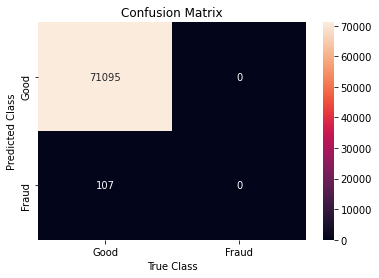

In [10]:
conf_matrix = confusion_matrix(y_test, y_pred)
Labels = ['Good', 'Fraud']
sns.heatmap(conf_matrix, xticklabels=Labels, yticklabels=Labels, annot=True, fmt='d')
plt.title('Confusion Matrix')
plt.xlabel('True Class')
plt.ylabel('Predicted Class')
plt.show()

In [11]:
# Evaluation of the model
print('Model Evaluation metrics - Isolation Forest')
print('Accuracy: ', accuracy_score(y_test, y_pred))
print('Precision: ', precision_score(y_test, y_pred))
print('F1: ', f1_score(y_test, y_pred))
print('Recall: ',recall_score(y_test, y_pred))
print('Matthews correlation coefficient', matthews_corrcoef(y_test, y_pred))

Model Evaluation metrics - Isolation Forest
Accuracy:  0.9984972332237858
Precision:  0.0
F1:  0.0
Recall:  0.0
Matthews correlation coefficient 0.0


/Users/mahi/opt/miniconda3/lib/python3.7/site-packages/sklearn/metrics/_classification.py:1221: UndefinedMetricWarning: Precision is ill-defined and being set to 0.0 due to no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))
/Users/mahi/opt/miniconda3/lib/python3.7/site-packages/sklearn/metrics/_classification.py:846: RuntimeWarning: invalid value encountered in double_scalars
  mcc = cov_ytyp / np.sqrt(cov_ytyt * cov_ypyp)


Although Accuracy is good, the model compromised on other metrics. Hence it is not useful to classify the transactions. However, this is a good benchmark for improving on accuracy

#### Model Building - Random Forest

Using Random forest classifier from sklearn library and evaluating the model from the results.

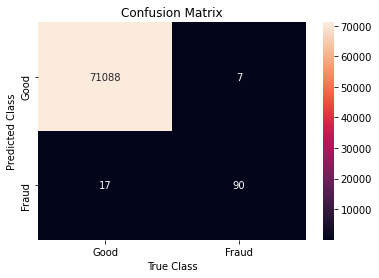

In [12]:
model_rf = RandomForestClassifier()
model_rf.fit(X_train, y_train)
y_pred = model_rf.predict(X_test)

conf_matrix = confusion_matrix(y_test, y_pred)
Labels = ['Good', 'Fraud']
sns.heatmap(conf_matrix, xticklabels=Labels, yticklabels=Labels, annot=True, fmt='d')
plt.title('Confusion Matrix')
plt.xlabel('True Class')
plt.ylabel('Predicted Class')
plt.show()

In [13]:
# Evaluation of the Ranfom Forest model
print('Model Evaluation metrics')
print('Accuracy: ', accuracy_score(y_test, y_pred))
print('Precision: ', precision_score(y_test, y_pred))
print('F1: ', f1_score(y_test, y_pred))
print('Recall: ',recall_score(y_test, y_pred))
print('Matthews correlation coefficient', matthews_corrcoef(y_test, y_pred))

Model Evaluation metrics
Accuracy:  0.9996629308165501
Precision:  0.9278350515463918
F1:  0.8823529411764706
Recall:  0.8411214953271028
Matthews correlation coefficient 0.8832494422098228


From the results, it can be understood that the model is good for classifying the transactions inspite of much imbalance in the data.

#### Model Building - Neural networks

Using multilayer perception model from the scikit learn library.

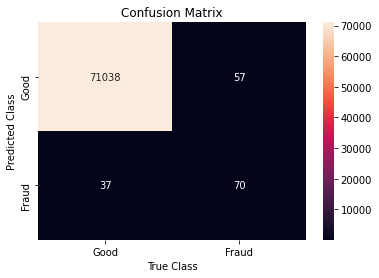

In [14]:
model_mlp = MLPClassifier()
model_mlp.fit(X_train, y_train)
y_pred = model_mlp.predict(X_test)

conf_matrix = confusion_matrix(y_test, y_pred)
Labels = ['Good', 'Fraud']
sns.heatmap(conf_matrix, xticklabels=Labels, yticklabels=Labels, annot=True, fmt='d')
plt.title('Confusion Matrix')
plt.xlabel('True Class')
plt.ylabel('Predicted Class')
plt.show()

In [15]:
# Evaluation of the Ranfom Forest model
print('Model Evaluation metrics')
print('Accuracy: ', accuracy_score(y_test, y_pred))
print('Precision: ', precision_score(y_test, y_pred))
print('F1: ', f1_score(y_test, y_pred))
print('Recall: ',recall_score(y_test, y_pred))
print('Matthews correlation coefficient', matthews_corrcoef(y_test, y_pred))

Model Evaluation metrics
Accuracy:  0.9986798123648212
Precision:  0.5511811023622047
F1:  0.5982905982905983
Recall:  0.6542056074766355
Matthews correlation coefficient 0.599836406656236


#### Model Building: Gradient Boosting

Using multilayer perceptron also generated very good results but the rank of Random Forest holds up still. Let's use the very famous Gradient Boosting algorithm. Using Gradient Boosting Classifier from scikit-learn library.

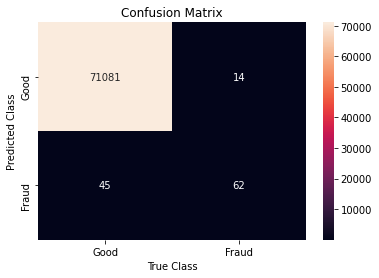

In [16]:
model_GB = GradientBoostingClassifier()
model_GB.fit(X_train, y_train)
y_pred = model_GB.predict(X_test)

conf_matrix = confusion_matrix(y_test, y_pred)
Labels = ['Good', 'Fraud']
sns.heatmap(conf_matrix, xticklabels=Labels, yticklabels=Labels, annot=True, fmt='d')
plt.title('Confusion Matrix')
plt.xlabel('True Class')
plt.ylabel('Predicted Class')
plt.show()

In [17]:
# Evaluation of the Ranfom Forest model
print('Model Evaluation metrics')
print('Accuracy: ', accuracy_score(y_test, y_pred))
print('Precision: ', precision_score(y_test, y_pred))
print('F1: ', f1_score(y_test, y_pred))
print('Recall: ',recall_score(y_test, y_pred))
print('Matthews correlation coefficient', matthews_corrcoef(y_test, y_pred))

Model Evaluation metrics
Accuracy:  0.9991713715906857
Precision:  0.8157894736842105
F1:  0.6775956284153005
Recall:  0.5794392523364486
Matthews correlation coefficient 0.6871486903784441


#### Model Building: H2O AutoML

In [18]:
import h2o
h2o.init()

Checking whether there is an H2O instance running at http://localhost:54321 ..... not found.
Attempting to start a local H2O server...
  Java Version: openjdk version "13.0.2" 2020-01-14; OpenJDK Runtime Environment (build 13.0.2+8); OpenJDK 64-Bit Server VM (build 13.0.2+8, mixed mode, sharing)
  Starting server from /Users/mahi/opt/miniconda3/lib/python3.7/site-packages/h2o/backend/bin/h2o.jar
  Ice root: /var/folders/x7/6vfrpdp16w99vnsp10m4bwqr0000gn/T/tmpz8qaoly4
  JVM stdout: /var/folders/x7/6vfrpdp16w99vnsp10m4bwqr0000gn/T/tmpz8qaoly4/h2o_mahi_started_from_python.out
  JVM stderr: /var/folders/x7/6vfrpdp16w99vnsp10m4bwqr0000gn/T/tmpz8qaoly4/h2o_mahi_started_from_python.err
  Server is running at http://127.0.0.1:54321
Connecting to H2O server at http://127.0.0.1:54321 ... successful.


H2O_cluster_uptime:,01 secs
H2O_cluster_timezone:,America/New_York
H2O_data_parsing_timezone:,UTC
H2O_cluster_version:,3.30.0.6
H2O_cluster_version_age:,1 month and 9 days
H2O_cluster_name:,H2O_from_python_mahi_scvzll
H2O_cluster_total_nodes:,1
H2O_cluster_free_memory:,4 Gb
H2O_cluster_total_cores:,12
H2O_cluster_allowed_cores:,12
H2O_cluster_status:,"accepting new members, healthy"


In [19]:
df_cc = h2o.import_file('creditcard.csv')
df_cc.head()

Parse progress: |█████████████████████████████████████████████████████████| 100%


Time,V1,V2,V3,V4,V5,V6,V7,V8,V9,V10,V11,V12,V13,V14,V15,V16,V17,V18,V19,V20,V21,V22,V23,V24,V25,V26,V27,V28,Amount,Class
0,-1.35981,-0.0727812,2.53635,1.37816,-0.338321,0.462388,0.239599,0.0986979,0.363787,0.0907942,-0.5516,-0.617801,-0.99139,-0.311169,1.46818,-0.470401,0.207971,0.0257906,0.403993,0.251412,-0.0183068,0.277838,-0.110474,0.0669281,0.128539,-0.189115,0.133558,-0.0210531,149.62,0
0,1.19186,0.266151,0.16648,0.448154,0.0600176,-0.0823608,-0.078803,0.0851017,-0.255425,-0.166974,1.61273,1.06524,0.489095,-0.143772,0.635558,0.463917,-0.114805,-0.183361,-0.145783,-0.0690831,-0.225775,-0.638672,0.101288,-0.339846,0.16717,0.125895,-0.0089831,0.0147242,2.69,0
1,-1.35835,-1.34016,1.77321,0.37978,-0.503198,1.8005,0.791461,0.247676,-1.51465,0.207643,0.624501,0.0660837,0.717293,-0.165946,2.34586,-2.89008,1.10997,-0.121359,-2.26186,0.52498,0.247998,0.771679,0.909412,-0.689281,-0.327642,-0.139097,-0.0553528,-0.0597518,378.66,0
1,-0.966272,-0.185226,1.79299,-0.863291,-0.0103089,1.2472,0.237609,0.377436,-1.38702,-0.0549519,-0.226487,0.178228,0.507757,-0.287924,-0.631418,-1.05965,-0.684093,1.96578,-1.23262,-0.208038,-0.1083,0.0052736,-0.190321,-1.17558,0.647376,-0.221929,0.0627228,0.0614576,123.5,0
2,-1.15823,0.877737,1.54872,0.403034,-0.407193,0.0959215,0.592941,-0.270533,0.817739,0.753074,-0.822843,0.538196,1.34585,-1.11967,0.175121,-0.451449,-0.237033,-0.0381948,0.803487,0.408542,-0.0094307,0.798278,-0.137458,0.141267,-0.20601,0.502292,0.219422,0.215153,69.99,0
2,-0.425966,0.960523,1.14111,-0.168252,0.420987,-0.0297276,0.476201,0.260314,-0.568671,-0.371407,1.34126,0.359894,-0.358091,-0.137134,0.517617,0.401726,-0.0581328,0.0686531,-0.0331938,0.0849677,-0.208254,-0.559825,-0.0263977,-0.371427,-0.232794,0.105915,0.253844,0.0810803,3.67,0
4,1.22966,0.141004,0.0453708,1.20261,0.191881,0.272708,-0.005159,0.0812129,0.46496,-0.0992543,-1.41691,-0.153826,-0.751063,0.167372,0.0501436,-0.443587,0.00282051,-0.611987,-0.045575,-0.219633,-0.167716,-0.27071,-0.154104,-0.780055,0.750137,-0.257237,0.0345074,0.00516777,4.99,0
7,-0.644269,1.41796,1.07438,-0.492199,0.948934,0.428118,1.12063,-3.80786,0.615375,1.24938,-0.619468,0.291474,1.75796,-1.32387,0.686133,-0.076127,-1.22213,-0.358222,0.324505,-0.156742,1.94347,-1.01545,0.0575035,-0.649709,-0.415267,-0.0516343,-1.20692,-1.08534,40.8,0
7,-0.894286,0.286157,-0.113192,-0.271526,2.6696,3.72182,0.370145,0.851084,-0.392048,-0.41043,-0.705117,-0.110452,-0.286254,0.0743554,-0.328783,-0.210077,-0.499768,0.118765,0.570328,0.0527357,-0.0734251,-0.268092,-0.204233,1.01159,0.373205,-0.384157,0.0117474,0.142404,93.2,0
9,-0.338262,1.11959,1.04437,-0.222187,0.499361,-0.246761,0.651583,0.0695386,-0.736727,-0.366846,1.01761,0.83639,1.00684,-0.443523,0.150219,0.739453,-0.54098,0.476677,0.451773,0.203711,-0.246914,-0.633753,-0.120794,-0.38505,-0.069733,0.0941988,0.246219,0.0830756,3.68,0


In [28]:
train, test = df_cc.split_frame(ratios=[.8])

In [21]:
from h2o.automl import H2OAutoML

x = df_cc.col_names[:-1]

automl = H2OAutoML(project_name='cc_fraud_detect', 
                  max_models=5,
                  max_runtime_secs=500,
                  sort_metric='MAE',
                  exclude_algos=['StackedEnsemble'],
                  seed=111)

automl.train(training_frame=train, y='Class', x=x)

AutoML progress: |████████████████████████████████████████████████████████| 100%


In [22]:
automl.leaderboard

model_id,mae,mean_residual_deviance,rmse,mse,rmsle
DRF_1_AutoML_20200809_171348,0.000991463,0.000698747,0.0264338,0.000698747,0.0188889
GLM_1_AutoML_20200809_171348,0.00334211,0.000823555,0.0286976,0.000823555,0.019153
XGBoost_1_AutoML_20200809_171348,0.0820074,0.00758134,0.0870709,0.00758134,0.0819682
XGBoost_2_AutoML_20200809_171348,0.113679,0.0134411,0.115936,0.0134411,0.108738
XGBoost_3_AutoML_20200809_171348,0.287395,0.0853246,0.292104,0.0853246,0.254796


In [23]:
automl.leader

Model Details
H2ORandomForestEstimator :  Distributed Random Forest
Model Key:  DRF_1_AutoML_20200809_171348


Model Summary: 


,,number_of_trees,number_of_internal_trees,model_size_in_bytes,min_depth,max_depth,mean_depth,min_leaves,max_leaves,mean_leaves
0,,2.0,2.0,3884.0,20.0,20.0,20.0,140.0,160.0,150.0




ModelMetricsRegression: drf
** Reported on train data. **

MSE: 0.0008452745709946638
RMSE: 0.02907360608859286
MAE: 0.0009148816381889274
RMSLE: 0.02030578381078007
Mean Residual Deviance: 0.0008452745709946638

ModelMetricsRegression: drf
** Reported on cross-validation data. **

MSE: 0.0006987474614720304
RMSE: 0.026433831759168597
MAE: 0.0009914629720465477
RMSLE: 0.018888949460408817
Mean Residual Deviance: 0.0006987474614720304

Cross-Validation Metrics Summary: 


,,mean,sd,cv_1_valid,cv_2_valid,cv_3_valid,cv_4_valid,cv_5_valid
0,mae,9.914637E-4,1.3481971E-4,0.001013266,8.1172626E-4,0.0011675102,9.161956E-4,0.0010486206
1,mean_residual_deviance,6.9874665E-4,2.1256402E-4,0.0010080697,5.6252565E-4,8.258828E-4,4.973353E-4,5.9991976E-4
2,mse,6.9874665E-4,2.1256402E-4,0.0010080697,5.6252565E-4,8.258828E-4,4.973353E-4,5.9991976E-4
3,r2,0.5801927,0.122572236,0.40842703,0.64565754,0.5153525,0.72682816,0.6046981
4,residual_deviance,6.9874665E-4,2.1256402E-4,0.0010080697,5.6252565E-4,8.258828E-4,4.973353E-4,5.9991976E-4
5,rmse,0.026200037,0.003921841,0.031750113,0.023717623,0.028738176,0.022301015,0.02449326
6,rmsle,0.018744914,0.0026029646,0.022023104,0.017067071,0.020865368,0.015854584,0.01791444



Scoring History: 


,,timestamp,duration,number_of_trees,training_rmse,training_mae,training_deviance
0,,2020-08-09 17:15:22,19.003 sec,0.0,NaN,NaN,NaN
1,,2020-08-09 17:15:23,19.984 sec,2.0,0.029074,0.000915,0.000845



Variable Importances: 


,variable,relative_importance,scaled_importance,percentage
0,V17,184.467560,1.000000,0.336862
1,V10,157.976807,0.856393,0.288487
2,V12,46.490303,0.252024,0.084897
3,V14,35.702633,0.193544,0.065198
4,V26,14.414145,0.078139,0.026322
5,V24,11.436176,0.061996,0.020884
6,V7,10.177014,0.055170,0.018585
7,V16,8.002266,0.043380,0.014613
8,V11,7.744418,0.041983,0.014142
9,V18,7.027680,0.038097,0.012833



See the whole table with table.as_data_frame()


In [24]:
automl.predict(test)

drf prediction progress: |████████████████████████████████████████████████| 100%


predict
0
0
0
0
0
0
0
0
0
0.000262329


So this is how predictions look like in automl. Models are build and sorted in the leaderboard according to the sorting metric "MAE" Mean Absolute Error. The first model in the leader is Distributed Random Forest which reminds us that the same algorithm performed better for this data before when we implemented using scikit-learn library.